In [1]:
import librosa          
import numpy as np      
import matplotlib.pyplot as plt  
import seaborn as sns   
import pandas as pd     
import os              
import glob            
import warnings        
warnings.filterwarnings('ignore')

# Librer√≠as de Machine Learning
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.svm import SVC                        
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

# Librer√≠as de Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential      
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import soundfile as sf  


In [2]:
import os
import glob
from collections import Counter

# Ruta al dataset MESD
MESD_PATH = "C:/Users/erick/Documents/05. IA/voz/data/MESD"

# Emociones reales en los nombres de archivo MESD
emociones_mesd_validas = ['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness']

# Verificar que la ruta existe
print("Verificando dataset MESD:")
if not os.path.exists(MESD_PATH):
    print(f"ADVERTENCIA: No se encuentra el dataset MESD en {MESD_PATH}")
else:
    print(f"Dataset MESD encontrado en {MESD_PATH}")

print("\n" + "="*60)

# Cargar archivos de MESD
print("Cargando MESD (Mexican Emotional Speech Database)...")
archivos_mesd = []
emociones_mesd = []

if os.path.exists(MESD_PATH):
    archivos_wav = glob.glob(os.path.join(MESD_PATH, "**/*.wav"), recursive=True)
    
    for archivo in archivos_wav:
        nombre_archivo = os.path.basename(archivo).lower()
        
        # Buscar si alguna emoci√≥n est√° presente al inicio del nombre
        emocion_detectada = None
        for emocion in emociones_mesd_validas:
            if nombre_archivo.startswith(emocion):
                emocion_detectada = emocion
                break
        
        if emocion_detectada:
            archivos_mesd.append(archivo)
            emociones_mesd.append(emocion_detectada)
        else:
            print(f"Archivo sin emoci√≥n reconocida: {nombre_archivo}")




Verificando dataset MESD:
Dataset MESD encontrado en C:/Users/erick/Documents/05. IA/voz/data/MESD

Cargando MESD (Mexican Emotional Speech Database)...


In [3]:
# Crear un DataFrame
df = pd.DataFrame({
    'archivo': archivos_mesd,
    'emocion': emociones_mesd
})

# An√°lisis
print("\nAN√ÅLISIS DE DISTRIBUCI√ìN DE EMOCIONES")
print("="*50)

conteo_emociones = df['emocion'].value_counts()
print("Archivos por emoci√≥n:")
print(conteo_emociones)



AN√ÅLISIS DE DISTRIBUCI√ìN DE EMOCIONES
Archivos por emoci√≥n:
emocion
disgust      144
fear         144
sadness      144
happiness    144
anger        143
neutral      143
Name: count, dtype: int64


In [4]:
df

archivo  emocion
0    C:/Users/erick/Documents/05. IA/voz/data/MESD\...    anger
1    C:/Users/erick/Documents/05. IA/voz/data/MESD\...    anger
2    C:/Users/erick/Documents/05. IA/voz/data/MESD\...    anger
3    C:/Users/erick/Documents/05. IA/voz/data/MESD\...    anger
4    C:/Users/erick/Documents/05. IA/voz/data/MESD\...    anger
..                                                 ...      ...
857  C:/Users/erick/Documents/05. IA/voz/data/MESD\...  sadness
858  C:/Users/erick/Documents/05. IA/voz/data/MESD\...  sadness
859  C:/Users/erick/Documents/05. IA/voz/data/MESD\...  sadness
860  C:/Users/erick/Documents/05. IA/voz/data/MESD\...  sadness
861  C:/Users/erick/Documents/05. IA/voz/data/MESD\...  sadness

[862 rows x 2 columns]

In [5]:
df['emocion'].unique()

array(['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness'],
      dtype=object)

In [6]:
#Vizualicion de audio de las emociones con espectrogramas y todo lo que se pueda
def plot_spectrogram(audio_path, title):
    audio, sr = librosa.load(audio_path, sr=None)
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia (Hz)')
    plt.grid()
    plt.show()


def plot_audio_waveform(audio_path, title):
    audio, sr = librosa.load(audio_path, sr=None)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(title)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.show()

In [7]:
emociones_principales = df['emocion'].unique()
df_filtrado = df.copy()


üéµ Visualizando 'ANGER' - Archivo: Anger_C_A_abajo.wav


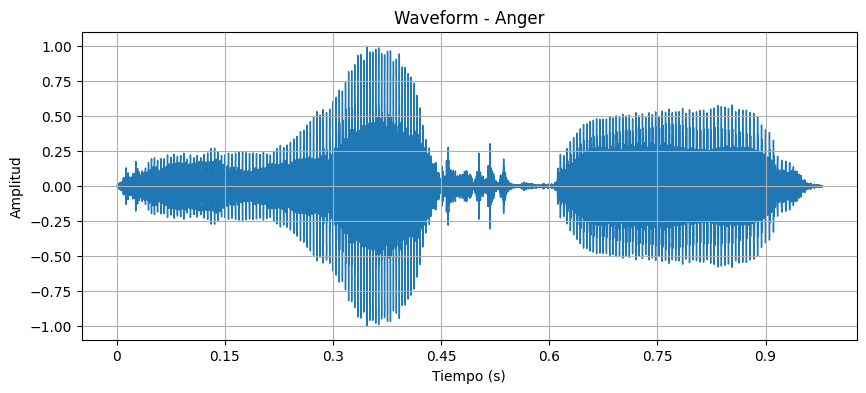

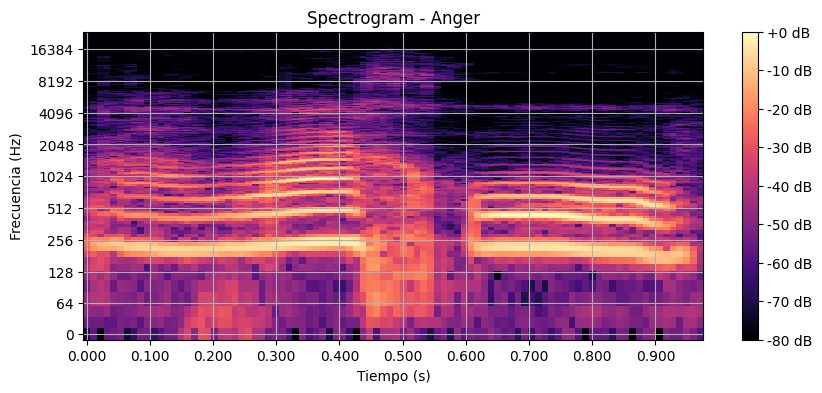


üéµ Visualizando 'DISGUST' - Archivo: Disgust_C_A_abajo.wav


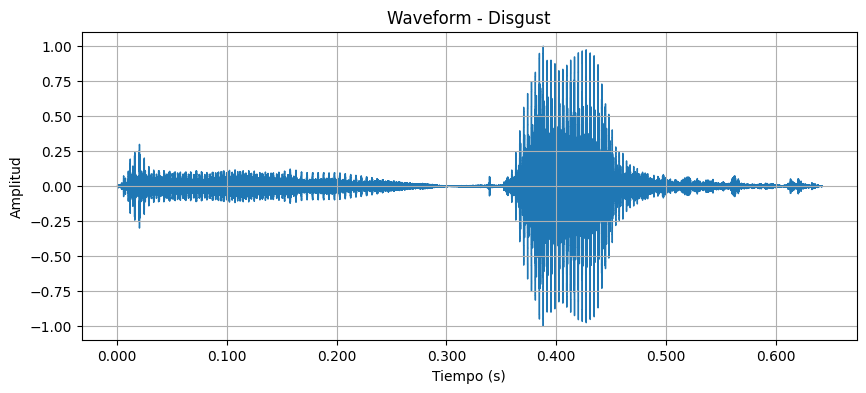

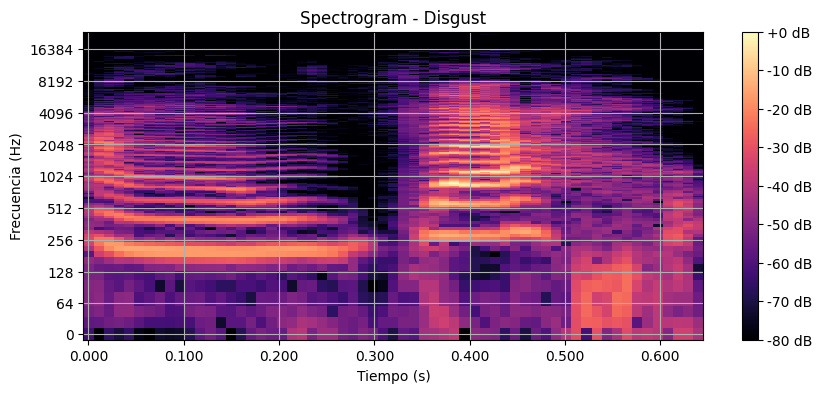


üéµ Visualizando 'FEAR' - Archivo: Fear_C_A_abajo.wav


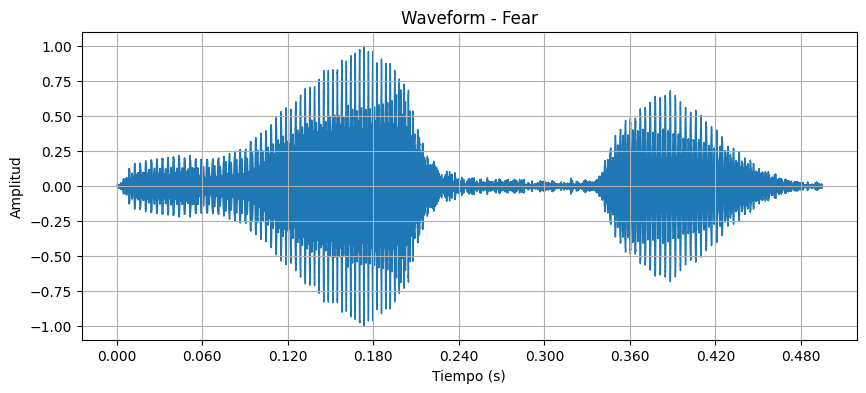

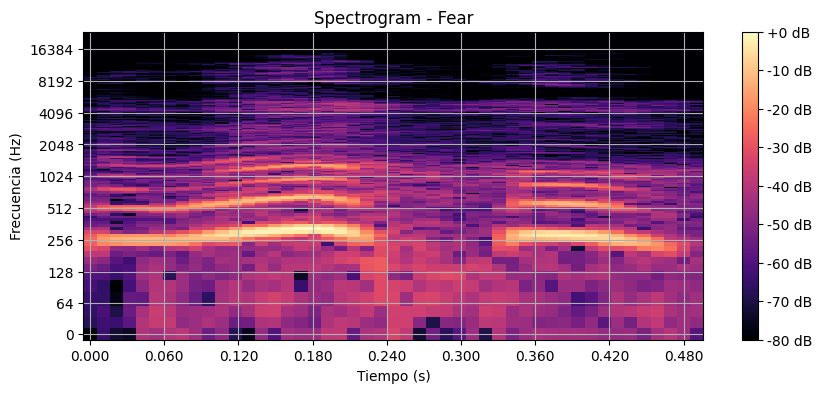


üéµ Visualizando 'HAPPINESS' - Archivo: Happiness_C_A_abajo.wav


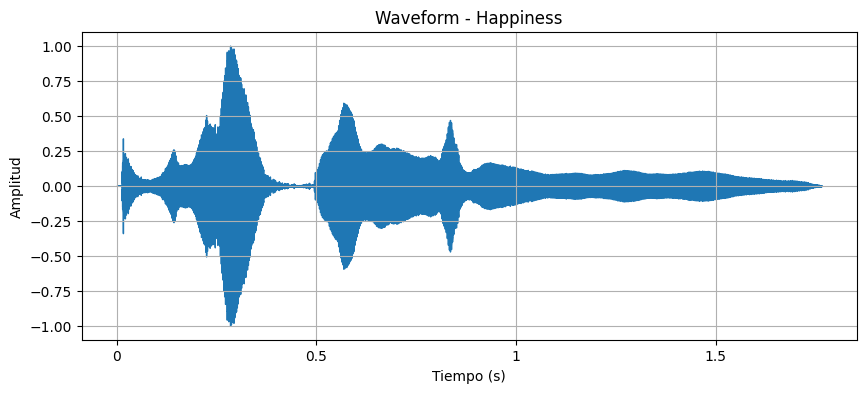

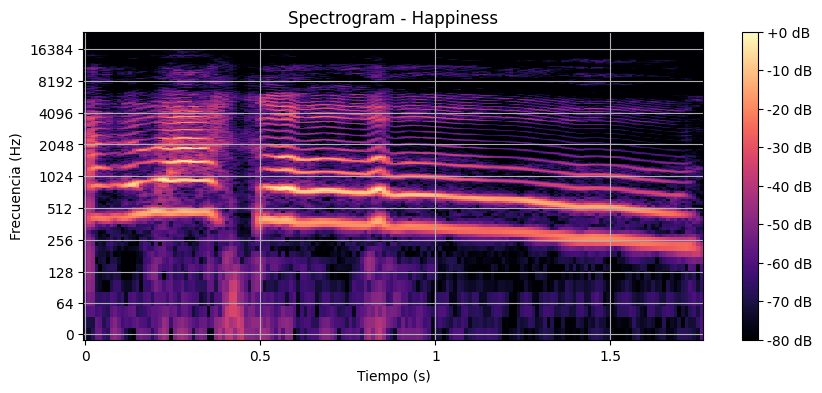


üéµ Visualizando 'NEUTRAL' - Archivo: Neutral_C_A_abajo.wav


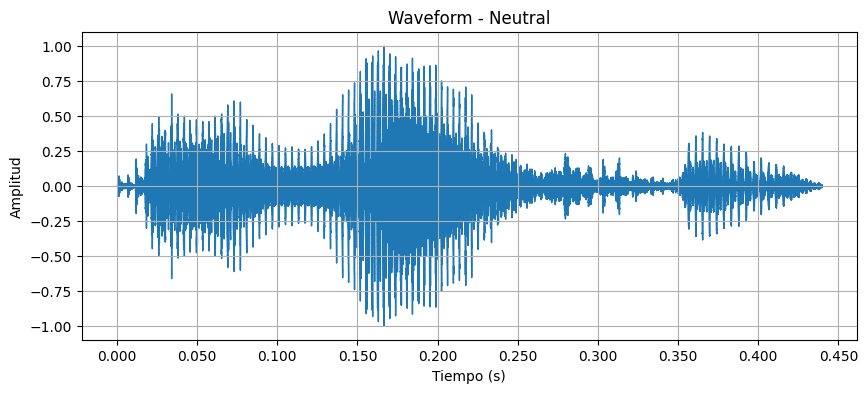

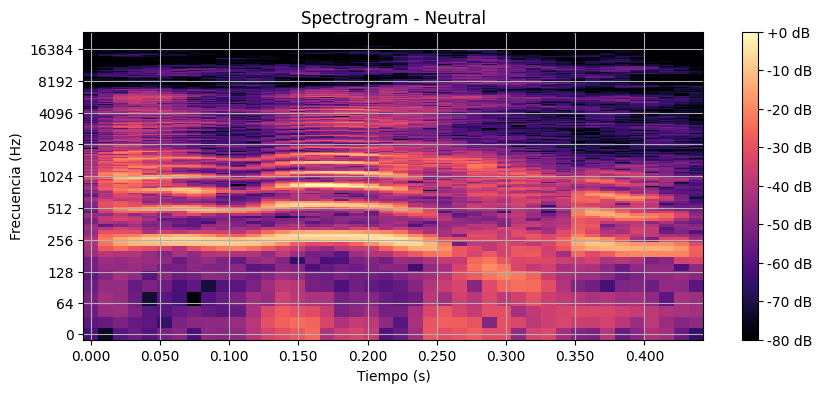


üéµ Visualizando 'SADNESS' - Archivo: Sadness_C_A_abajo.wav


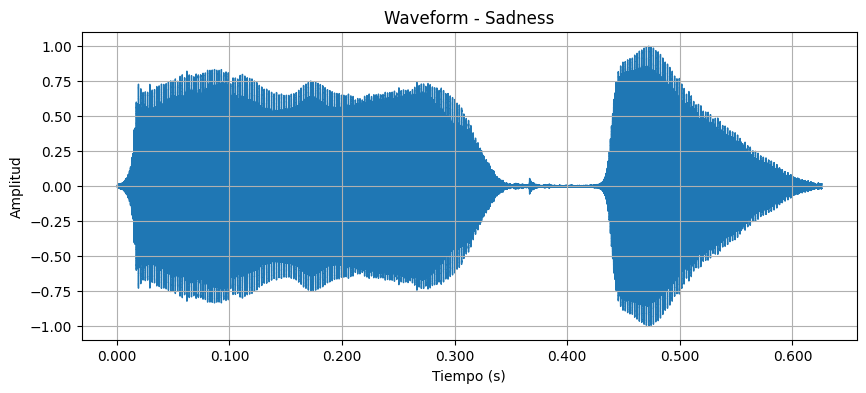

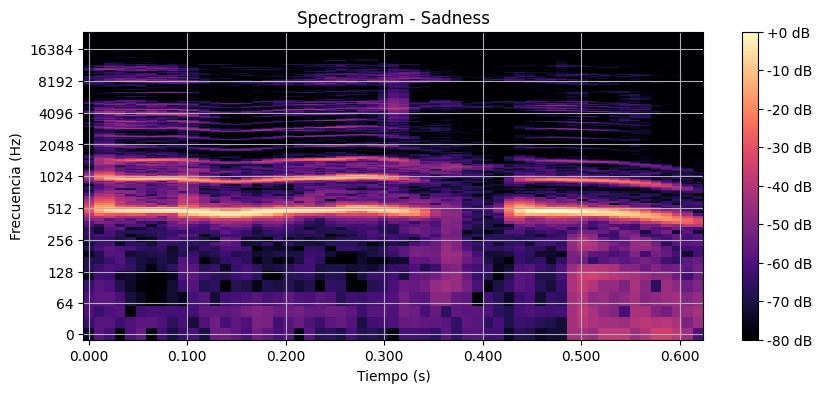

In [8]:
for emocion in emociones_principales:
    archivos_emocion = df_filtrado[df_filtrado['emocion'] == emocion]['archivo'].values
    if len(archivos_emocion) > 0:
        ejemplo_audio = archivos_emocion[0]
        print(f"\nüéµ Visualizando '{emocion.upper()}' - Archivo: {os.path.basename(ejemplo_audio)}")
        plot_audio_waveform(ejemplo_audio, f"Waveform - {emocion.capitalize()}")
        plot_spectrogram(ejemplo_audio, f"Spectrogram - {emocion.capitalize()}")
    else:
        print(f"No hay archivos para la emoci√≥n: {emocion}")

In [9]:
# Preparar listas para almacenar caracter√≠sticas y etiquetas
todas_las_caracteristicas = []
todas_las_etiquetas = []

# Configuraci√≥n para extracci√≥n de caracter√≠sticas
n_mfcc = 13        # N√∫mero de coeficientes MFCC
n_chroma = 12      # N√∫mero de caracter√≠sticas crom√°ticas
frame_length = 2048
hop_length = 512

print(f"Procesando {len(df_filtrado)} archivos de audio...")
print("Extrayendo caracter√≠sticas: MFCC, Chroma, Energ√≠a, Pitch")

# Contador para mostrar progreso
contador = 0
total_archivos = len(df_filtrado)

for index, row in df_filtrado.iterrows():
    archivo = row['archivo']
    emocion = row['emocion']
    
    try:
        # Cargar archivo de audio
        audio, sr = librosa.load(archivo, sr=22050)  # Normalizar a 22kHz
        
        # 1. MFCC (Mel-Frequency Cepstral Coefficients)
        # Captura las caracter√≠sticas espectrales del habla
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, 
                                   n_fft=frame_length, hop_length=hop_length)
        mfcc_mean = np.mean(mfcc, axis=1)  # Promedio de cada coeficiente
        mfcc_std = np.std(mfcc, axis=1)    # Desviaci√≥n est√°ndar
        
        # 2. CHROMA (Caracter√≠sticas crom√°ticas)
        # Captura el contenido arm√≥nico y tonal
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr, 
                                           n_fft=frame_length, hop_length=hop_length)
        chroma_mean = np.mean(chroma, axis=1)
        chroma_std = np.std(chroma, axis=1)
        
        # 3. ESPECTROGRAMA MEL
        # Representa la energ√≠a en diferentes bandas de frecuencia
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr,
                                                 n_fft=frame_length, hop_length=hop_length)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        mel_mean = np.mean(mel_spec_db, axis=1)
        mel_std = np.std(mel_spec_db, axis=1)
        
        # 4. CARACTER√çSTICAS TEMPORALES
        # Zero Crossing Rate (tasa de cruces por cero)
        zcr = librosa.feature.zero_crossing_rate(audio, frame_length=frame_length, 
                                               hop_length=hop_length)
        zcr_mean = np.mean(zcr)
        zcr_std = np.std(zcr)
        
        # 5. CARACTER√çSTICAS DE ENERG√çA
        # RMS (Root Mean Square) - energ√≠a del audio
        rms = librosa.feature.rms(y=audio, frame_length=frame_length, 
                                 hop_length=hop_length)
        rms_mean = np.mean(rms)
        rms_std = np.std(rms)
        
        # 6. CARACTER√çSTICAS DE PITCH (FUNDAMENTAL FREQUENCY)
        # Frecuencia fundamental - qu√© tan aguda o grave es la voz
        pitches, magnitudes = librosa.piptrack(y=audio, sr=sr, 
                                             fmin=75, fmax=600)  # Rango t√≠pico de voz humana
        
        # Extraer pitch dominante
        pitch_values = []
        for t in range(pitches.shape[1]):
            index = magnitudes[:, t].argmax()
            pitch = pitches[index, t]
            if pitch > 0:
                pitch_values.append(pitch)
        
        if len(pitch_values) > 0:
            pitch_mean = np.mean(pitch_values)
            pitch_std = np.std(pitch_values)
            pitch_min = np.min(pitch_values)
            pitch_max = np.max(pitch_values)
        else:
            pitch_mean = pitch_std = pitch_min = pitch_max = 0
        
        # 7. CARACTER√çSTICAS ESPECTRALES ADICIONALES
        # Centroide espectral - "brillo" del sonido
        spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
        sc_mean = np.mean(spectral_centroid)
        sc_std = np.std(spectral_centroid)
        
        # Rolloff espectral - frecuencia por debajo de la cual est√° el 85% de la energ√≠a
        spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
        sr_mean = np.mean(spectral_rolloff)
        sr_std = np.std(spectral_rolloff)
        
        # 8. COMBINAR TODAS LAS CARACTER√çSTICAS
        caracteristicas_archivo = np.concatenate([
            mfcc_mean, mfcc_std,           # MFCC: 13 + 13 = 26 caracter√≠sticas
            chroma_mean, chroma_std,       # Chroma: 12 + 12 = 24 caracter√≠sticas
            mel_mean, mel_std,             # Mel: 128 + 128 = 256 caracter√≠sticas
            [zcr_mean, zcr_std],           # ZCR: 2 caracter√≠sticas
            [rms_mean, rms_std],           # RMS: 2 caracter√≠sticas
            [pitch_mean, pitch_std, pitch_min, pitch_max],  # Pitch: 4 caracter√≠sticas
            [sc_mean, sc_std],             # Spectral Centroid: 2 caracter√≠sticas
            [sr_mean, sr_std]              # Spectral Rolloff: 2 caracter√≠sticas
        ])
        
        # Almacenar caracter√≠sticas y etiqueta
        todas_las_caracteristicas.append(caracteristicas_archivo)
        todas_las_etiquetas.append(emocion)
        
        contador += 1
        if contador % 500 == 0:
            progreso = (contador / total_archivos) * 100
            print(f"Progreso: {contador}/{total_archivos} ({progreso:.1f}%)")
            
    except Exception as e:
        print(f"Error procesando {archivo}: {e}")
        continue

print(f"\nExtracci√≥n completada: {len(todas_las_caracteristicas)} archivos procesados")

# Convertir a arrays de NumPy
X = np.array(todas_las_caracteristicas)
y = np.array(todas_las_etiquetas)

print(f"\nDimensiones finales:")
print(f"Caracter√≠sticas (X): {X.shape}")
print(f"Etiquetas (y): {y.shape}")
print(f"Total de caracter√≠sticas por archivo: {X.shape[1]}")

# Verificar que no hay valores NaN o infinitos
print(f"\nVerificaci√≥n de datos:")
print(f"Valores NaN en X: {np.isnan(X).sum()}")
print(f"Valores infinitos en X: {np.isinf(X).sum()}")

# Reemplazar valores problem√°ticos si existen
if np.isnan(X).sum() > 0 or np.isinf(X).sum() > 0:
    print("Limpiando valores problem√°ticos...")
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    print("Limpieza completada")

# Mostrar estad√≠sticas b√°sicas de las caracter√≠sticas
print(f"\nEstad√≠sticas de las caracter√≠sticas:")
print(f"Valor m√≠nimo: {X.min():.6f}")
print(f"Valor m√°ximo: {X.max():.6f}")
print(f"Promedio: {X.mean():.6f}")
print(f"Desviaci√≥n est√°ndar: {X.std():.6f}")

# Mostrar distribuci√≥n de etiquetas procesadas
print(f"\nDistribuci√≥n final de emociones:")
etiquetas_unicas, conteos = np.unique(y, return_counts=True)
for etiqueta, conteo in zip(etiquetas_unicas, conteos):
    print(f"  {etiqueta}: {conteo} archivos")


Procesando 862 archivos de audio...
Extrayendo caracter√≠sticas: MFCC, Chroma, Energ√≠a, Pitch
Progreso: 500/862 (58.0%)

Extracci√≥n completada: 862 archivos procesados

Dimensiones finales:
Caracter√≠sticas (X): (862, 318)
Etiquetas (y): (862,)
Total de caracter√≠sticas por archivo: 318

Verificaci√≥n de datos:
Valores NaN en X: 0
Valores infinitos en X: 0

Estad√≠sticas de las caracter√≠sticas:
Valor m√≠nimo: -375.097900
Valor m√°ximo: 7559.639345
Promedio: 16.208220
Desviaci√≥n est√°ndar: 293.169521

Distribuci√≥n final de emociones:
  anger: 143 archivos
  disgust: 144 archivos
  fear: 144 archivos
  happiness: 144 archivos
  neutral: 143 archivos
  sadness: 144 archivos


In [10]:
X

array([[-257.67230225,  168.11672974,    6.2567606 , ...,  588.57953042,
        2032.63422057, 1947.83066727],
       [-199.21998596,   94.70280457,   28.89680099, ..., 1511.88050105,
        3307.30424361, 2215.22577128],
       [-240.25003052,   57.91317368,   16.10055351, ..., 2222.80106976,
        4261.84387207, 2819.88137132],
       ...,
       [-283.85308838,  114.8000946 ,   11.97256851, ...,  571.87913759,
        1734.09576416, 1453.5508684 ],
       [-271.38119507,   67.04164886,   18.87832451, ...,  619.73725607,
        3429.01710304, 1855.07152732],
       [-214.56558228,   33.46595383,   32.81811523, ..., 2490.15979875,
        5596.34898793, 3236.71807317]])

In [11]:


# NORMALIZACI√ìN DE CARACTER√çSTICAS
# Las caracter√≠sticas tienen escalas muy diferentes (MFCC vs energ√≠a vs pitch)
# StandardScaler convierte todo a media=0 y desviaci√≥n=1
print("Aplicando normalizaci√≥n StandardScaler...")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Estad√≠sticas ANTES de normalizar:")
print(f"  Promedio: {X.mean():.6f}")
print(f"  Desviaci√≥n est√°ndar: {X.std():.6f}")
print(f"  Rango: [{X.min():.2f}, {X.max():.2f}]")

print("\nEstad√≠sticas DESPU√âS de normalizar:")
print(f"  Promedio: {X_scaled.mean():.6f}")
print(f"  Desviaci√≥n est√°ndar: {X_scaled.std():.6f}")
print(f"  Rango: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")


Aplicando normalizaci√≥n StandardScaler...
Estad√≠sticas ANTES de normalizar:
  Promedio: 16.208220
  Desviaci√≥n est√°ndar: 293.169521
  Rango: [-375.10, 7559.64]

Estad√≠sticas DESPU√âS de normalizar:
  Promedio: -0.000000
  Desviaci√≥n est√°ndar: 1.000000
  Rango: [-4.33, 6.65]


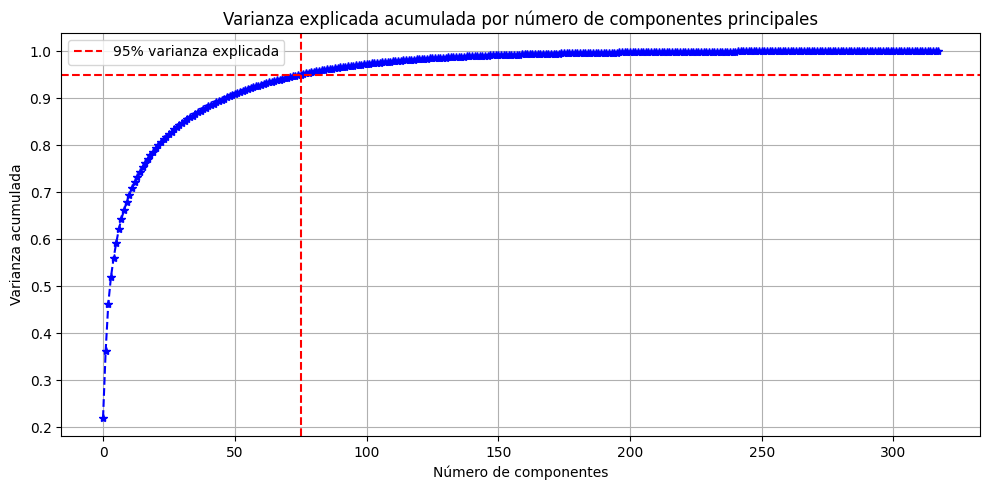

In [12]:

from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA().fit(X_scaled) 
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Graficar varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.plot(explained_var, marker='*', linestyle='--', color='b')
plt.title('Varianza explicada acumulada por n√∫mero de componentes principales')
plt.xlabel('N√∫mero de componentes')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza explicada')
plt.axvline(x=np.argmax(explained_var >= 0.95), color='r', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
from sklearn.decomposition import PCA

# Aplicar PCA con 95% de varianza retenida
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


In [14]:
X_pca.shape

(862, 76)

In [15]:
# CODIFICACI√ìN DE ETIQUETAS
# Convertir texto a n√∫meros para los algoritmos
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"\nCodificaci√≥n de emociones:")
for i, emocion in enumerate(le.classes_):
    print(f"  {emocion} -> {i}")


Codificaci√≥n de emociones:
  anger -> 0
  disgust -> 1
  fear -> 2
  happiness -> 3
  neutral -> 4
  sadness -> 5


In [16]:
# DIVISION DE DATOS
# 70% entrenamiento, 15% validaci√≥n, 15% prueba
print(f"\nDividiendo datos...")

# Primero: 70% entrenamiento, 30% temporal
X_train, X_temp, y_train, y_temp = train_test_split(
    X_pca, y_encoded, 
    test_size=0.3, 
    random_state=100, 
    stratify=y_encoded  # Mantener proporciones de cada emoci√≥n
)

# Segundo: dividir el 30% en validaci√≥n (15%) y prueba (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    random_state=100, 
    stratify=y_temp
)

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de validaci√≥n: {X_val.shape[0]} muestras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

# Verificar que las proporciones se mantienen
# print(f"\nVerificaci√≥n de balance en cada conjunto:")
# for y_conjunto, nombre in [(y_train, "entrenamiento"), (y_val, "validaci√≥n"), (y_test, "prueba")]:
#     print(f"\n{nombre.upper()}:")
#     etiquetas_unicas, conteos = np.unique(y_conjunto, return_counts=True)
#     for etiqueta, conteo in zip(etiquetas_unicas, conteos):
#         emocion = le.inverse_transform([etiqueta])[0]
#         porcentaje = conteo / len(y_conjunto) * 100
#         print(f"  {emocion}: {conteo} ({porcentaje:.1f}%)")


Dividiendo datos...
Conjunto de entrenamiento: 603 muestras (70.0%)
Conjunto de validaci√≥n: 129 muestras (15.0%)
Conjunto de prueba: 130 muestras (15.1%)


In [17]:

svm_model = SVC(
    kernel='rbf',      # Kernel no lineal para capturar relaciones complejas
    C=1.0,            # Regularizaci√≥n (balance entre margen y errores)
    gamma='scale',     # Par√°metro del kernel RBF
    random_state=100
)


In [18]:
svm_model.fit(X_train, y_train)

SVC(random_state=100)

In [19]:
# Hacer predicciones

y_pred_svm = svm_model.predict(X_test)


Evaluaci√≥n del modelo SVC:
              precision    recall  f1-score   support

       anger       0.89      0.73      0.80        22
     disgust       0.80      0.73      0.76        22
        fear       0.90      0.90      0.90        21
   happiness       0.82      0.86      0.84        21
     neutral       0.89      0.77      0.83        22
     sadness       0.67      0.91      0.77        22

    accuracy                           0.82       130
   macro avg       0.83      0.82      0.82       130
weighted avg       0.83      0.82      0.82       130



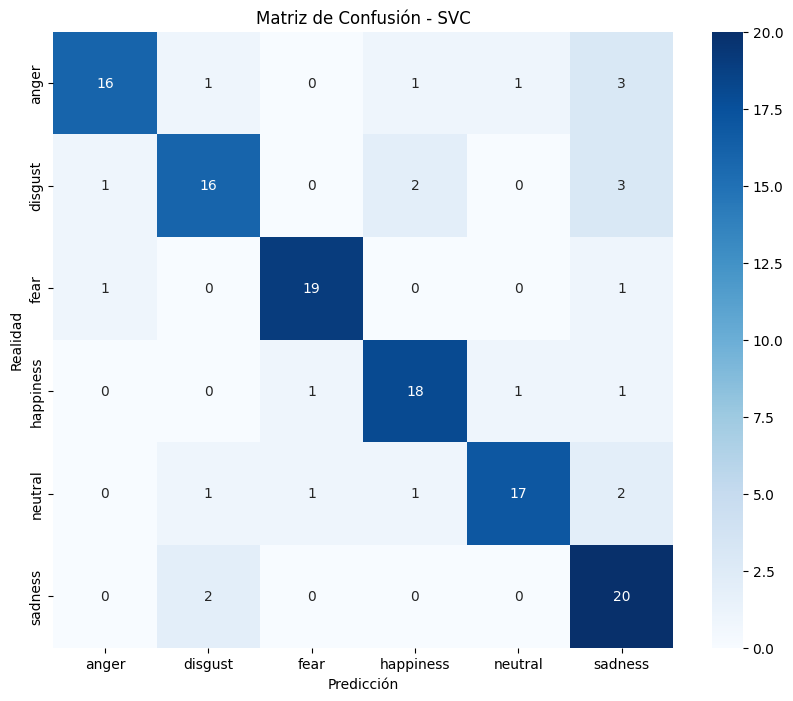


Precisi√≥n del modelo SVC: 0.82 (81.5%)


In [20]:
# Evaluar modelo
print("\nEvaluaci√≥n del modelo SVC:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))
# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusi√≥n - SVC")
plt.xlabel("Predicci√≥n")    
plt.ylabel("Realidad")
plt.show()
# Calcular precisi√≥n
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nPrecisi√≥n del modelo SVC: {accuracy:.2f} ({accuracy * 100:.1f}%)")


In [21]:
# Reshape para CNN 1D: (muestras, caracter√≠sticas, 1)

# Las CNNs esperan datos en formato (muestras, caracter√≠sticas, canales)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
num_classes = len(le.classes_)
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

In [23]:
model_cnn = Sequential([
    # Primera capa convolucional
    Conv1D(filters=64, kernel_size=5, activation='relu', 
           input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # Segunda capa convolucional
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # Tercera capa convolucional
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # Aplanar para capas densas
    Flatten(),
    
    # Capas densas (completamente conectadas)
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    
    # Capa de salida
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
# Parar si no mejora la validacion
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Reducir learning rate si se estanca
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001,
    verbose=1
)

# Entrenar el modelo

history = model_cnn.fit(
    X_train_cnn, y_train_onehot,
    batch_size=32,
    epochs=100,  # M√°ximo 50 √©pocas
    validation_data=(X_val_cnn, y_val_onehot),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 32ms/step - accuracy: 0.1835 - loss: 1.8378 - val_accuracy: 0.2171 - val_loss: 1.7914 - learning_rate: 0.0010
Epoch 2/100
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - accuracy: 0.1756 - loss: 1.8124 - val_accuracy: 0.1938 - val_loss: 1.7895 - learning_rate: 0.0010
Epoch 3/100
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - accuracy: 0.1836 - loss: 1.7836 - val_accuracy: 0.2093 - val_loss: 1.7885 - learning_rate: 0.0010
Epoch 4/100
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - accuracy: 0.1665 - loss: 1.8007 - val_accuracy: 0.2248 - val_loss: 1.7884 - learning_rate: 0.0010
Epoch 5/100
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step - accuracy: 0.1466 - loss: 1.8030 - val_accuracy: 0.1938 - val_loss: 1.7879 - learning_rate: 0.0010
Epoch 6/100
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

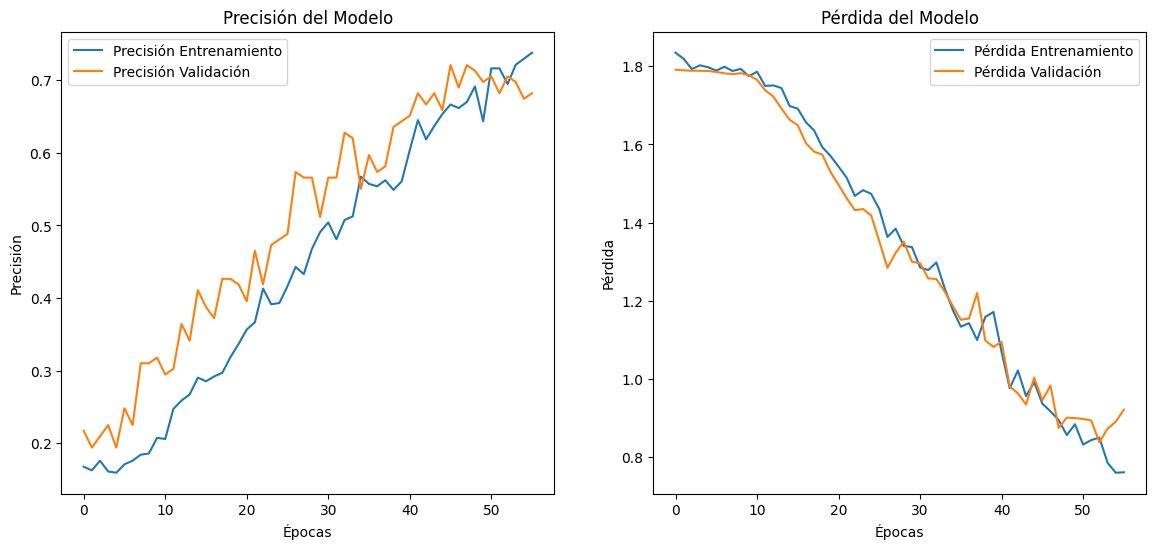

In [25]:
# Gr√°fico de precisi√≥n y loss 
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisi√≥n Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisi√≥n Validaci√≥n')
plt.title('Precisi√≥n del Modelo')
plt.xlabel('√âpocas')
plt.ylabel('Precisi√≥n')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='P√©rdida Entrenamiento')
plt.plot(history.history['val_loss'], label='P√©rdida Validaci√≥n')
plt.title('P√©rdida del Modelo')
plt.xlabel('√âpocas')
plt.ylabel('P√©rdida')
plt.legend()




5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step

Evaluaci√≥n del modelo CNN:
              precision    recall  f1-score   support

       anger       0.74      0.64      0.68        22
     disgust       0.65      0.50      0.56        22
        fear       0.54      0.67      0.60        21
   happiness       0.65      0.81      0.72        21
     neutral       0.54      0.59      0.57        22
     sadness       0.72      0.59      0.65        22

    accuracy                           0.63       130
   macro avg       0.64      0.63      0.63       130
weighted avg       0.64      0.63      0.63       130



Text(0.5, 1.0, 'Matriz de Confusi√≥n - CNN')

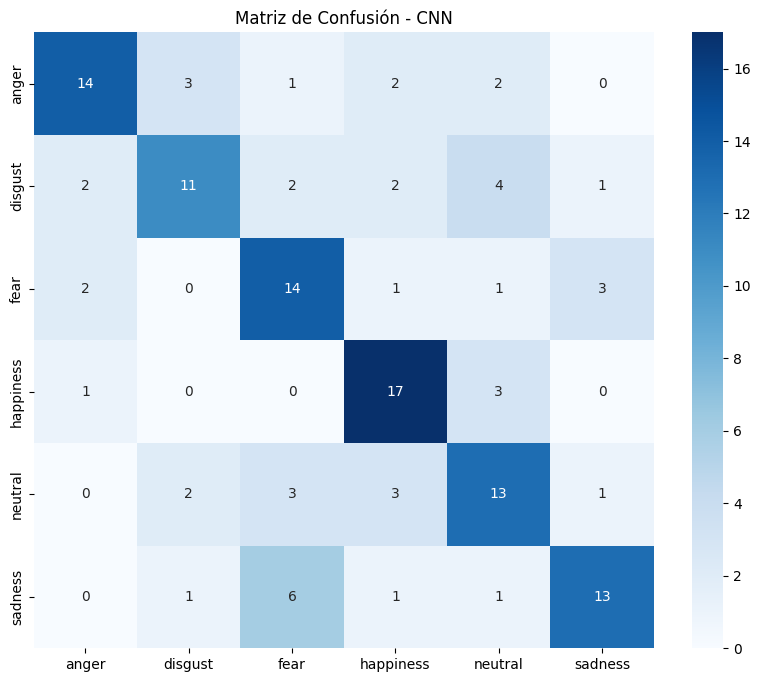

In [26]:
# Matriz de confusi√≥n para CNN
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred_cnn, axis=1)
# Evaluar modelo CNN
print("\nEvaluaci√≥n del modelo CNN:")
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))
# Matriz de confusi√≥n
cm_cnn = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusi√≥n - CNN")


In [27]:
# Paso 1: Define la ruta del nuevo archivo de voz
archivo = "3.wav"  

# Paso 2: Copia aqu√≠ tu bloque de extracci√≥n tal como est√°, sin el for/try externo

# Cargar archivo de audio
audio, sr = librosa.load(archivo, sr=22050)

# MFCC
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, 
                            n_fft=frame_length, hop_length=hop_length)
mfcc_mean = np.mean(mfcc, axis=1)
mfcc_std = np.std(mfcc, axis=1)

# CHROMA
chroma = librosa.feature.chroma_stft(y=audio, sr=sr, 
                                     n_fft=frame_length, hop_length=hop_length)
chroma_mean = np.mean(chroma, axis=1)
chroma_std = np.std(chroma, axis=1)

# MEL
mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr,
                                          n_fft=frame_length, hop_length=hop_length)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
mel_mean = np.mean(mel_spec_db, axis=1)
mel_std = np.std(mel_spec_db, axis=1)

# ZCR
zcr = librosa.feature.zero_crossing_rate(audio, frame_length=frame_length, 
                                         hop_length=hop_length)
zcr_mean = np.mean(zcr)
zcr_std = np.std(zcr)

# RMS
rms = librosa.feature.rms(y=audio, frame_length=frame_length, 
                          hop_length=hop_length)
rms_mean = np.mean(rms)
rms_std = np.std(rms)

# PITCH
pitches, magnitudes = librosa.piptrack(y=audio, sr=sr, fmin=75, fmax=600)
pitch_values = []
for t in range(pitches.shape[1]):
    index = magnitudes[:, t].argmax()
    pitch = pitches[index, t]
    if pitch > 0:
        pitch_values.append(pitch)

if len(pitch_values) > 0:
    pitch_mean = np.mean(pitch_values)
    pitch_std = np.std(pitch_values)
    pitch_min = np.min(pitch_values)
    pitch_max = np.max(pitch_values)
else:
    pitch_mean = pitch_std = pitch_min = pitch_max = 0

# CENTROIDES Y ROLLOFF
spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
sc_mean = np.mean(spectral_centroid)
sc_std = np.std(spectral_centroid)

spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
sr_mean = np.mean(spectral_rolloff)
sr_std = np.std(spectral_rolloff)

# COMBINAR TODAS LAS CARACTER√çSTICAS
caracteristicas_archivo = np.concatenate([
    mfcc_mean, mfcc_std,
    chroma_mean, chroma_std,
    mel_mean, mel_std,
    [zcr_mean, zcr_std],
    [rms_mean, rms_std],
    [pitch_mean, pitch_std, pitch_min, pitch_max],
    [sc_mean, sc_std],
    [sr_mean, sr_std]
]).reshape(1, -1)

# Paso 3: Normalizar y aplicar PCA
caracteristicas_scaled = scaler.transform(caracteristicas_archivo)
caracteristicas_pca = pca.transform(caracteristicas_scaled)

# Paso 4: Predecir con tu modelo
pred_svm = svm_model.predict(caracteristicas_pca)
print(" Emoci√≥n detectada (SVM):", le.inverse_transform(pred_svm)[0])

# Si quieres probar la CNN tambi√©n:
caract_cnn = caracteristicas_pca.reshape(1, caracteristicas_pca.shape[1], 1)
pred_cnn = model_cnn.predict(caract_cnn)
print(" Emoci√≥n detectada (CNN):", le.inverse_transform([np.argmax(pred_cnn)])[0])


 Emoci√≥n detectada (SVM): happiness
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step
 Emoci√≥n detectada (CNN): happiness


In [29]:
# GUARDAR MODELOS PARA EL BOT DE TELEGRAM
import joblib
import os

# Crear directorio para modelos
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"üìÅ Directorio '{models_dir}' creado")

try:
    # Guardar scaler
    scaler_path = os.path.join(models_dir, 'scaler.pkl')
    joblib.dump(scaler, scaler_path)
    print(f"‚úÖ Scaler guardado: {scaler_path}")
    
    # Guardar PCA
    pca_path = os.path.join(models_dir, 'pca.pkl')
    joblib.dump(pca, pca_path)
    print(f"‚úÖ PCA guardado: {pca_path}")
    
    # Guardar SVM
    svm_path = os.path.join(models_dir, 'svm_model.pkl')
    joblib.dump(svm_model, svm_path)
    print(f"‚úÖ SVM guardado: {svm_path}")
    
    # Guardar Label Encoder
    le_path = os.path.join(models_dir, 'label_encoder.pkl')
    joblib.dump(le, le_path)
    print(f"‚úÖ Label Encoder guardado: {le_path}")
    
    # El modelo CNN ya est√° guardado como 'modelo_cnn.h5'
    # Copiarlo al directorio de modelos
    import shutil
    if os.path.exists('modelo_cnn.h5'):
        cnn_dest = os.path.join(models_dir, 'modelo_cnn.h5')
        shutil.copy2('modelo_cnn.h5', cnn_dest)
        print(f"‚úÖ CNN copiado: {cnn_dest}")
    
    print(f"\nüéâ Todos los modelos guardados en: {models_dir}")
    print("\nüìã Archivos listos para el bot:")
    for file in ['scaler.pkl', 'pca.pkl', 'svm_model.pkl', 'label_encoder.pkl', 'modelo_cnn.h5']:
        file_path = os.path.join(models_dir, file)
        if os.path.exists(file_path):
            size = os.path.getsize(file_path) / 1024 / 1024  # MB
            print(f"  ‚úì {file} ({size:.1f} MB)")
        else:
            print(f"  ‚úó {file} (faltante)")
            
except Exception as e:
    print(f"‚ùå Error guardando modelos: {e}")

üìÅ Directorio 'models' creado
‚úÖ Scaler guardado: models\scaler.pkl
‚úÖ PCA guardado: models\pca.pkl
‚úÖ SVM guardado: models\svm_model.pkl
‚úÖ Label Encoder guardado: models\label_encoder.pkl

üéâ Todos los modelos guardados en: models

üìã Archivos listos para el bot:
  ‚úì scaler.pkl (0.0 MB)
  ‚úì pca.pkl (0.2 MB)
  ‚úì svm_model.pkl (0.4 MB)
  ‚úì label_encoder.pkl (0.0 MB)
  ‚úó modelo_cnn.h5 (faltante)


In [30]:
# Guardar el modelo CNN primero
print("Guardando modelo CNN...")
model_cnn.save('modelo_cnn.h5')
print("‚úÖ Modelo CNN guardado como modelo_cnn.h5")

# Copiarlo a la carpeta models
import shutil
if os.path.exists('modelo_cnn.h5'):
    cnn_dest = os.path.join('models', 'modelo_cnn.h5')
    shutil.copy2('modelo_cnn.h5', cnn_dest)
    size = os.path.getsize(cnn_dest) / 1024 / 1024  # MB
    print(f"‚úÖ CNN copiado a: {cnn_dest} ({size:.1f} MB)")
else:
    print("‚ùå Error: No se pudo guardar modelo_cnn.h5")

Guardando modelo CNN...
‚úÖ Modelo CNN guardado como modelo_cnn.h5
‚úÖ CNN copiado a: models\modelo_cnn.h5 (1.4 MB)
